# Modélisation d'un réseau social

Un réseau social est d'abord un ensemble de relations entre entités. Par exemple dans le cas des réseaux sociaux (linked-in, facebook, twitter, instagram, snapchat ...), les entités sont supposés être des êtres humains qui ont plus ou moins de relations avec d'autres êtres humains.

## Quelques notions essentielles

Pour modéliser ces relations on se sert d'objets mathématiques appelés les *graphes*. Quelques définitions sont essentielles pour pouvoir caractériser un graphe :
> Un **nœud** sert à modéliser un individu, un lieu, ou tout autre une entité sociale.
> Une **arête** représentée par un trait entre deux nœuds, sert à modéliser une relation non-orientée (qui ne se fait pas dans un seul sens) entre deux individus ou entités.
> Un **arc** est une relation semblable à celle de l'arête sauf que dans ce cas il y a une orientation spécifique, par exemple A est un "follower" de B, mais la réciproque est fausse : B ne suit pas A. Dans la première partie nous allons voir des graphes non-orientés, ensuite nous nous intéresseront aux graphes orientés.

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

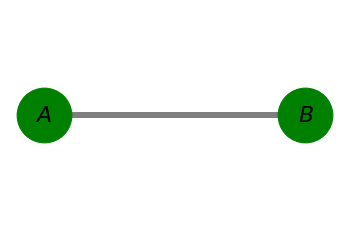

In [2]:
# Dans ce premier exemple on s'interesse 
# Exemple de graphe non orienté entre "A" et "B" 

# On va d'abord initialiser le graphe en question que l'on appelle "G"

G = nx.from_numpy_matrix(np.matrix([[0,1],[1,0]]))

# On va ensuite signaler la position des noeuds grâce à leurs coordonnées et leur adresse 

pos = {0: (0, 0),
       1: (1, 0),}

# On va enfin renomer les noeuds d'adresse "0" et "1" en utilisant "A" et "B"

labels={}
labels[0]=r'$A$'
labels[1]=r'$B$'

# Puis finalement on va afficher tout cela en couleurs 

nx.draw_networkx_nodes(G, pos, node_size=3000, nodelist=[0, 1], node_color='g')
nx.draw_networkx_labels(G,pos,labels,font_size=22)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=6)

plt.axis('off')
plt.show()

Dans cet exemple "A" et "B" sont en relation : cette relation va dans les deux sens, il y a une arête et deux nœuds. On appelle aussi ces nœuds des sommets. Finalement on peut introduire un tableau appellé **matrice d'adjacence** qui permet de relier très simplement "A" à "B".
_____

$$\matrix{
 & A & B \cr
A & 0 & 1 \cr
B & 1 & 0 \cr}$$

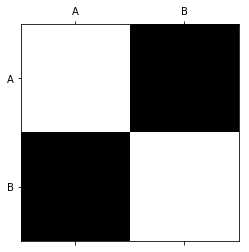

In [3]:
A = np.matrix([[0,1],[1,0]])
fig, ax = plt.subplots()
ax.set_xticklabels([" ","A","B"])
ax.set_yticklabels([" ","A","B"])
plt.spy(A)

On voit, noir sur blanc, que le noir correspond à la présence d'une relation entre "A" et "B" et entre "B" et "A". Nous allons voire dans l'exemple suivant comment rélier entre eux six sommets en utilisant la même règle.  

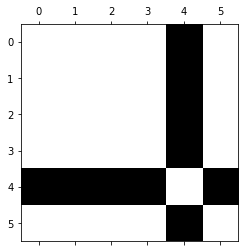

In [4]:
A = np.matrix([[0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[0,0,0,0,1,0],[1,1,1,1,0,1],[0,0,0,0,1,0]])
plt.spy(A)

Dans cet exemple tous les sommets sont connectés au point '4' mais ils ne sont pas reliés entre eux. On dit que '4' est la *star* du réseau. Cela se visualise de la façon suivante : 

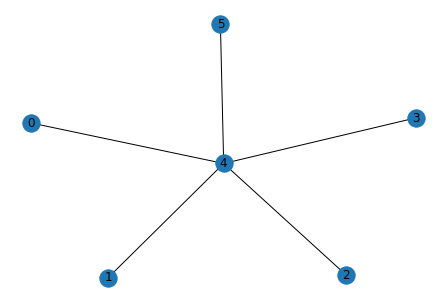

In [5]:
G = nx.from_numpy_matrix(A)
nx.draw(G,with_labels=True)
plt.show()

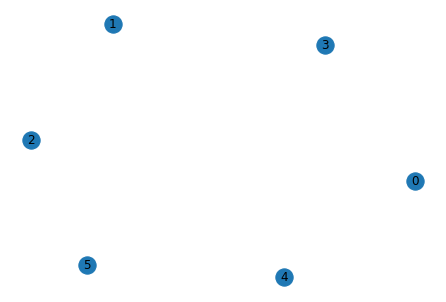

In [6]:
# Ecrivez ici un code pour que ce soit 2 qui devienne la nouvelle star du réseau
# On notera 'B' la matrice d'adjacence :


B = np.matrix([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])
G = nx.from_numpy_matrix(B)
nx.draw(G,with_labels=True)
plt.show()


### Exemple des familles de Florence

Dans la pratique financière établie au Moyen-Age l'importance d'une lettre de change (ce qui est un chèque aujourd'hui) est cruciale pour le commerce. A la fin du XIV sciècle une famille de Florence, la maison de Médicis est un exemple de réussite économique. Pendant plusieures générations ils vont mettre en place un réseau de gens de confiance pour assurer la tenue des postes de change filiales d'une maison mere. Le choix des familles en relation faisant ainsi l’objet d’un soin particulier. Une banque recrutait ses membres au sein du clan familial ou parmi ses alliés, c'est à dire des familles associées par des marriages. Les Médicis furent extraordinairement efficaces pour créer un réseau de familles florentines. Dans l'exercice suivant nous allons étudier ce type de réseau.   

In [7]:
# D'abord on importe le graphe des familles du module NetworkX
G = nx.florentine_families_graph()
G.edges(data=True)
adjacency_matrix = nx.adjacency_matrix(G)
# En utilisant la commande "plt.spy" indiquez quelle est l'index de la famille la plus populaire ?

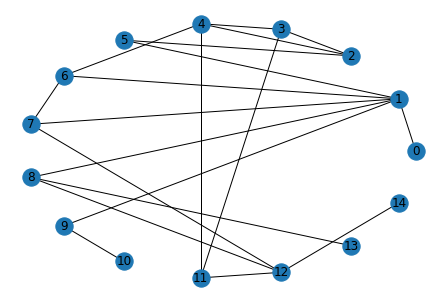

In [8]:
# On va déclarer un nouveau Graphe qui partant de la même matrice d'adjacence dispose les familles au sommet d'un
# polygone proche d'une ellipse
G2 = nx.from_scipy_sparse_matrix(adjacency_matrix)
nx.draw_circular(G2,with_labels=True)

On remarque tout d'abord que la famille qui rayonne le plus est la famille d'index '1', c'est la seule qui puisse mettre en relation '2' et '10'... Elle a donc un rôle privilégié.

In [9]:
print('Dans ce graphe il y a', len(G.nodes()), 'noeuds et', len(G.edges()), 'arêtes')

Dans ce graphe il y a 15 noeuds et 20 arêtes


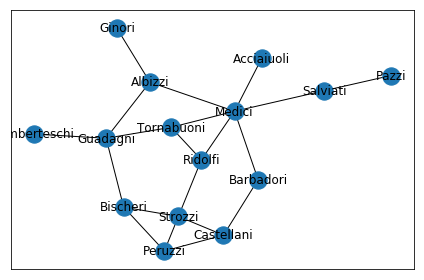

In [10]:
# Affichage
# On choisit de représenter les relations
# La famille Medici aparaît bien au centre du graphe

pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G, pos=pos)

plt.tight_layout()
plt.show()

In [11]:
# on peut dénombrer les relations qui sont représentées ici
# en utilisant l'attribut "size" du graphe
G.size()

20

On va maintenant signaler plus clairement les relations de la famille de Medici elle même.

In [12]:
# Les Noeud correspondent bien à chacune des familles avec l'orthographe italiènne
print(G.nodes())

['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']


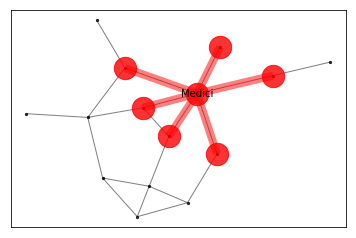

In [13]:
# On va chercher tous les noeux
nx.draw_networkx_nodes(G,pos,
                       node_color='k',
                       node_size=5,
                       alpha=0.8)

# Puis on s'interesse en particulier à ceux qui sont liés aux Medici                       
nx.draw_networkx_nodes(G,pos,
                       nodelist=['Acciaiuoli','Medici', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi','Salviati'],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
# On affiche les arêtes
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)

# On souligne celles qui sont directement en contact avec les medici

nx.draw_networkx_edges(G,pos,
                       edgelist=[('Medici','Salviati'),('Medici','Barbadori'),('Medici','Ridolfi'),('Medici','Acciaiuoli'),('Medici','Tornabuoni'),('Medici','Albizzi') ],
                       width=8,alpha=0.5,edge_color='r')

# On va clairement identifier le noeud qui correspond au Medici

H = G.subgraph('Medici')
labels = nx.draw_networkx_labels(H,pos,font_size=10)




Les [Médicis](https://fr.wikipedia.org/wiki/Maison_de_M%C3%A9dicis) sont au centre d'un réseau de 15 familles, dont les relations sont modélisées par des arêtes. Par leur position ils contrôlent un grand nombre de relations, on peut ainsi mesurer leur popularité. On comprends le rôle essentiel de cette famille dans la politique économique et culturelle du XIV et du XV sciecle à Florence et partout en Europe ! Imaginons cependant que les Medici aient une famille "rivale", on prendra celle qui a le réseau le plus éloigné, pour l'exemple il s'agit des [Strozzi](https://fr.wikipedia.org/wiki/Famille_Strozzi) la deuxième famille plus influente selon le calcul .  

In [14]:
noeuds_et_aretes = sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse = True)
## On veut savoir quelles sont les trois familles les plus puissantes
noeuds_et_aretes[:3]

[('Medici', 6), ('Strozzi', 4), ('Guadagni', 4)]

*On va faire la même étude avec une autre famille influente : les Strozzi, pour visualiser leur influence il faut superposer les deux graphes, en rouge les relations des Médicis et en jaune celle des Strozzi*

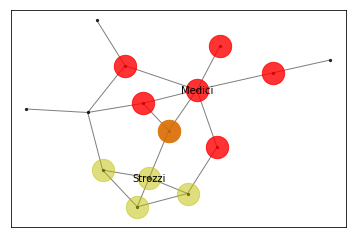

In [15]:
# On va chercher tous les noeux
nx.draw_networkx_nodes(G,pos,
                       node_color='k',
                       node_size=5,
                       alpha=0.8)

# Puis on s'interesse en particulier à ceux qui sont liés aux Medici                       
nx.draw_networkx_nodes(G,pos,
                       nodelist=['Acciaiuoli','Medici', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi','Salviati'],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

# Et enfin on s'interesse à ceux qui sont liés aux Strozzi                       
nx.draw_networkx_nodes(G,pos,
                       nodelist=['Strozzi','Ridolfi', 'Bischeri', 'Castellani','Peruzzi'],
                       node_color='y',
                       node_size=500,
                       alpha=0.5)

H = G.subgraph(['Medici','Strozzi'])
labels = nx.draw_networkx_labels(H,pos,font_size=10)

nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
# L'instruction suivante vous permet de sauver la figure avec les
# relations entre Strozzi et Médicis
#plt.savefig("Medici_et_Strozzi.png")

*On veut faire la même étude avec une autre famille influente : les Guadagni, pouvez vous superposer les deux graphes comme nous l'avont fait pour les Strozzi*

In [16]:
# On peut calculer le degré de centralité 
# Cette mesure nous permet d'obtenir l'activité du nœud étudié

degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

Les Strozzi apparaissent vraiment comme "excentrés" par rapport au réseau. Ce problème qui les contraindra à l'exil peut être anticipé en utilisant la théorie des graphes. On peut maintenant se posser la question autrement : " qui peux jouer le rôle d'intermédiaire entre les Médicis et les Strozzi ? " A priori il faut une famille qui entre dans les relations des Médicis et des Strozzi.

In [17]:
#La centralité de proximité
#Un nœud plus central a une distance plus faible à tous les autres nœuds.

closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

On remarque que la famille Ridolfi arrive en deuxième position après les Médicis en terme de centralité de proximité. Est ce possible d'imaginer qu'elle puisse servir d'intermédiaire entre les deux familles rivales ?

(-0.938800395638293, 1.1079692741167007, -0.775936469553569, 0.776714979133951)

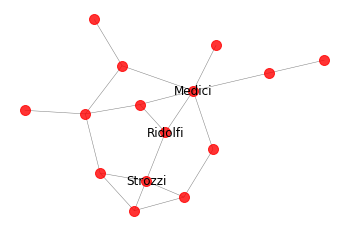

In [18]:
# On va montrer que les Ridolfi sont les seuls intermédiaires directs entre les Médicis et les Strozzi.
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=100,
                       alpha=0.8)


H = G.subgraph(['Medici','Strozzi','Ridolfi'])
labels = nx.draw_networkx_labels(H,pos,font_size=12)

nx.draw_networkx_edges(G,pos,width=0.5,alpha=0.5)
plt.axis('off')

In [19]:
print("Rayon: %d" % nx.radius(G))
print("Diamètre: %d" % nx.diameter(G))
print("Excenticité: %s" % nx.eccentricity(G))
print("Centre: %s" % nx.center(G))

Rayon: 3
Diamètre: 5
Excenticité: {'Acciaiuoli': 4, 'Medici': 3, 'Castellani': 4, 'Peruzzi': 5, 'Strozzi': 4, 'Barbadori': 4, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 4, 'Pazzi': 5, 'Bischeri': 5, 'Guadagni': 4, 'Ginori': 4, 'Lamberteschi': 5}
Centre: ['Medici', 'Ridolfi', 'Tornabuoni', 'Albizzi']


In [20]:
j=0
Proximite=[]
for i in closeness_centrality:
        Close=closeness_centrality[i]
        Proximite.append(Close)

In [21]:
node_sizes = [3 + np.ceil(pow(10 *i,4)) for i in Proximite]
print(node_sizes)

[188.0, 987.0, 232.0, 188.0, 370.0, 370.0, 628.0, 547.0, 547.0, 232.0, 70.0, 259.0, 478.0, 127.0, 116.0]


Finalement on représente le réseau des familles de Florence, et positionnant des noeuds d'autant plus grands que le nœud est plus central

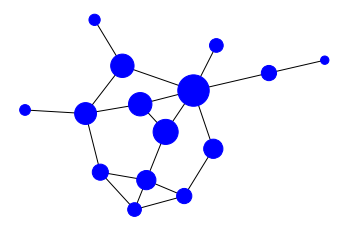

In [22]:
node_sizes = [3 +  pow(10 *i,4) for i in Proximite]

M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, width=1)

ax = plt.gca()
ax.set_axis_off()
plt.show()

# Conclusion 
On voit comment la famille des Médicis à compris me monde pour changer le monde. Dans notre étude nous avons prouvé que quelque soit la représentation choisie (il y en à une infinité) un graphe permet de visualiser des relations entre individus. C'est donc un outil de choix pour la gestion des réseaux  

# Ouverture
Autre exemple : le parcours...
Les graphes sont très importants pour déterminer le plus court chemin entre des lieux.

Si l'on prends l'exemple Le graphe de connexion  ainsi que le distance séparant deux gares connectées directement (et non les autres gares à un horizon plus lointain) sont connues.

La distance (minimale) entre la gare d'arrivée et chaque gare intermédiaire est déterminée au fur et à mesure, ainsi que le chemin associé. C’est bien là tout l’intérêt de l’algorithme : donner la distance minimale et le chemin entre une gare d’arrivée et une autre gare (la gare de départ).